In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tag_name = np.load("tag_name.npy").reshape(19, 1)
print(tag_name)

[['faces']
 ['left_foot']
 ['visual_digits']
 ['left_hand']
 ['calculation']
 ['language']
 ['horizontal_checkerboard']
 ['human_sound']
 ['vertical_checkerboard']
 ['objects']
 ['places']
 ['scramble']
 ['right_hand']
 ['right_foot']
 ['visual_words']
 ['visual']
 ['non_human_sound']
 ['auditory']
 ['saccades']]


In [3]:
train_X = np.load("train_X.npy")
train_binary_Y = np.load("train_binary_Y.npy")
valid_test_X = np.load("valid_test_X.npy")
print("train_X shape")
print(train_X.shape)
print("train_binary_Y shape")
print(train_binary_Y.shape)
print("valid_text_X shape")
print(valid_test_X.shape)
print(train_X[0][:, 0, :].shape)
print(train_binary_Y[0])

train_X shape
(4602, 26, 31, 23)
train_binary_Y shape
(4602, 19)
valid_text_X shape
(1971, 26, 31, 23)
(26, 23)
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


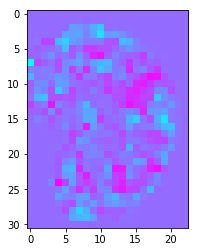

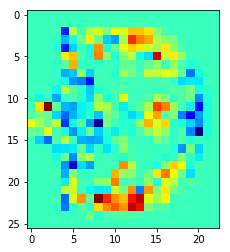

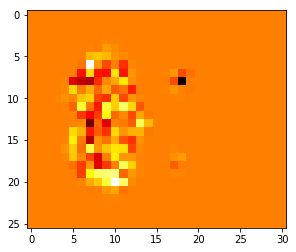

In [4]:
fig1 = plt.figure()
plt.imshow(train_X[0][0, :, :], cmap="cool", interpolation="none")
fig2 = plt.figure()
plt.imshow(train_X[0][:, 0, :], cmap="jet", interpolation="none")
fig3 = plt.figure()
plt.imshow(train_X[0][:, :, 0], cmap="hot", interpolation="none")
plt.show()

In [5]:
min = []
max = []
mean = []
for i in range(23):
    min.append(np.amin(train_X[2000][:, i, :]))
    max.append(np.amax(train_X[2000][:, i, :]))
    mean.append(np.amax(train_X[2000][:, i, :]))
print(np.array(min) * np.power(1, 15))
print(np.array(max) * np.power(1, 15))
print(np.array(mean) * np.power(1, 15))

[ -9.71500881e-16  -6.82621103e-01  -2.55205419e+00  -2.66859067e+00
  -2.51201060e+00  -2.76249793e+00  -3.47832462e+00  -3.96981385e+00
  -2.86293830e+00  -3.29175727e+00  -4.24271307e+00  -4.06189188e+00
  -3.29647664e+00  -3.14589367e+00  -2.94615246e+00  -2.61067988e+00
  -3.56454028e+00  -3.46236040e+00  -2.68648458e+00  -2.94355167e+00
  -3.20675415e+00  -3.65274529e+00  -2.95356596e+00]
[  1.28839945e-15   8.00160436e-02   5.55077635e+00   5.16763890e+00
   4.75970289e+00   4.95756733e+00   6.78372712e+00   6.49134278e+00
   5.17578298e+00   6.71555108e+00   7.38901887e+00   7.47376803e+00
   5.85913443e+00   5.05008335e+00   4.92352111e+00   2.80310606e+00
   2.75933900e+00   4.84103413e+00   6.86818424e+00   4.89350192e+00
   5.65438369e+00   5.38996678e+00   4.13942719e+00]
[  1.28839945e-15   8.00160436e-02   5.55077635e+00   5.16763890e+00
   4.75970289e+00   4.95756733e+00   6.78372712e+00   6.49134278e+00
   5.17578298e+00   6.71555108e+00   7.38901887e+00   7.47376803e+

In [6]:
#print(train_X[2000][:, :, 0])

In [24]:
train_X_flat = np.reshape(train_X, (4602, -1))
valid_test_X_flat = np.reshape(valid_test_X, (1971, -1))

In [25]:
print(train_X_flat.shape)
print(valid_test_X_flat.shape)

(4602, 18538)
(1971, 18538)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_flat_standard = scaler.fit_transform(train_X_flat)
valid_test_X_flat_standard = scaler.fit_transform(valid_test_X_flat)

In [47]:
# from sklearn.linear_model import RidgeClassifierCV

In [48]:
# ridgeClassifier = RidgeClassifierCV(normalize = True, cv = 5)
# ridgeClassifier.fit(train_X_flat_standard, train_binary_Y)

ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovrClassifier = OneVsRestClassifier(SVC(kernel='linear'))
ovrClassifier.fit(train_X_flat_standard, train_binary_Y)

In [ ]:
predicted = ovrClassifier.predict(valid_test_X)

In [ ]:
print(predicted.shape)